In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('default of credit card clients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [4]:
print(df.shape)

(30000, 25)


In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Exploratory Data Analysis

<AxesSubplot:title={'center':'Default Payment Next Month\n (1=Yes, 0=No)'}, xlabel='default.payment.next.month', ylabel='values'>

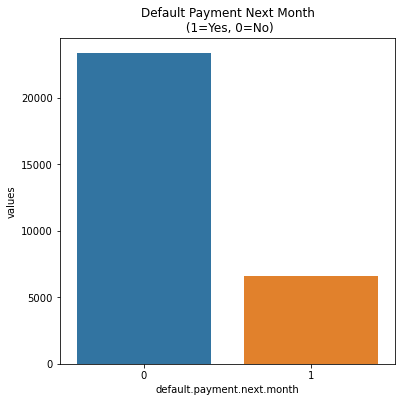

In [6]:
# check the distribution of target variabel

count = df['default.payment.next.month'].value_counts()
data = pd.DataFrame({'default.payment.next.month': count.index,
                    'values':count.values})
plt.figure(figsize=(6,6))
plt.title('Default Payment Next Month\n (1=Yes, 0=No)')
sns.barplot(x='default.payment.next.month', y='values', data=data)

<AxesSubplot:>

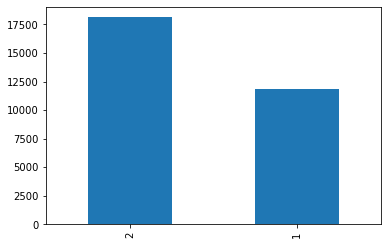

In [7]:
# Sex

df['SEX'].value_counts().plot.bar()

<AxesSubplot:title={'center':'default payment next month based on gender'}, xlabel='SEX', ylabel='count'>

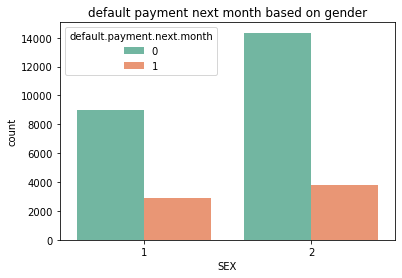

In [8]:
plt.title('default payment next month based on gender')
sns.countplot(x='SEX', data=df, hue="default.payment.next.month",
             palette="Set2")

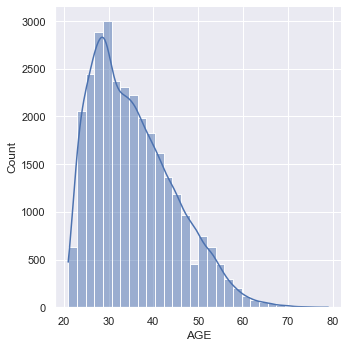

In [9]:
sns.set_theme()
sns.displot(df['AGE'], kde=True, bins=30)

<AxesSubplot:>

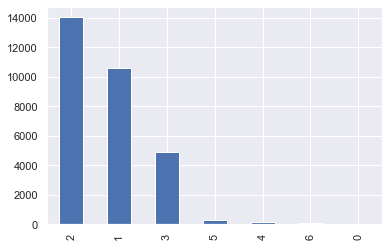

In [10]:
df['EDUCATION'].value_counts().plot.bar()

<AxesSubplot:title={'center':'default payment next month based on education'}, xlabel='EDUCATION', ylabel='count'>

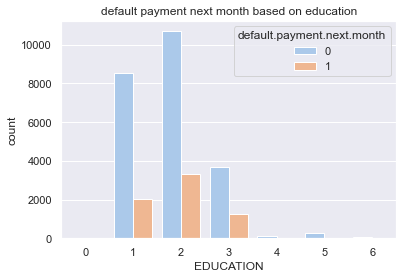

In [11]:
plt.title('default payment next month based on education')
sns.countplot(x='EDUCATION', data=df, hue="default.payment.next.month",
             palette="pastel")

<AxesSubplot:>

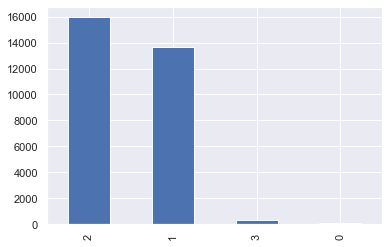

In [12]:
df['MARRIAGE'].value_counts().plot.bar()

<AxesSubplot:title={'center':'default payment next month based on marriage'}, xlabel='MARRIAGE', ylabel='count'>

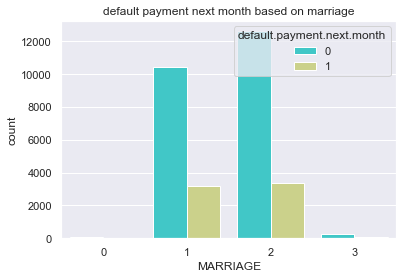

In [13]:
plt.title('default payment next month based on marriage')
sns.countplot(x='MARRIAGE', data=df, hue="default.payment.next.month",
             palette="rainbow")

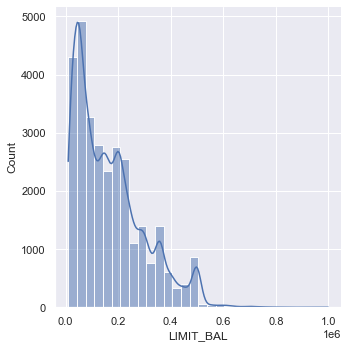

In [14]:
sns.displot(df['LIMIT_BAL'], kde=True, bins=30)

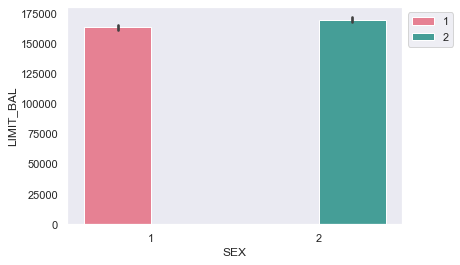

In [15]:
sns.set_style("dark")
sns.barplot(x='SEX', y='LIMIT_BAL', data=df, hue="SEX",
             palette="husl")
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Predictive Modeling

In [17]:
df = df.drop(['ID'], axis=1)

In [18]:
# pisahkan target
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

print(x.shape)
print(y.shape)

(30000, 23)
(30000,)


In [19]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [31]:
# Apply random forest

rfc = RandomForestClassifier(n_estimators=100, criterion='entropy',
                            random_state=3)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=3)

In [32]:
y_pred = rfc.predict(x_test)

In [33]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8141333333333334


In [23]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18133333333333335
Mean Squared Error: 0.18133333333333335
Root Mean Squared Error: 0.42583251793790167


In [24]:
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = ['default.payment.next.month']

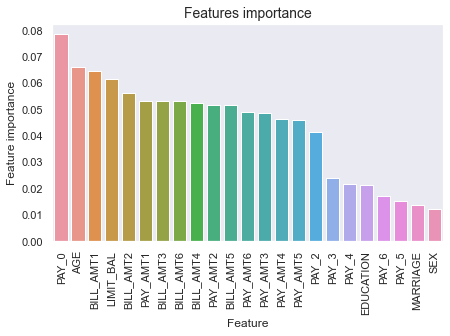

In [34]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [26]:
print("Numbers of Decision Tree: ", len(rfc.estimators_))
rfc.estimators_

Numbers of Decision Tree:  10


[DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                        random_state=218175338),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                        random_state=303761048),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                        random_state=893988089),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                        random_state=1460070019),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                        random_state=1249426360),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                        random_state=521102280),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                        random_state=46504192),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                        

In [27]:
clf = RandomForestClassifier(n_estimators=50, criterion='gini',
                            random_state=1, max_depth=7)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=1)

In [28]:
y_pred2 = clf.predict(x_test)

In [29]:
acc = accuracy_score(y_test, y_pred2)
print(acc)

0.8181333333333334


In [30]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 0.18186666666666668
Mean Squared Error: 0.18186666666666668
Root Mean Squared Error: 0.4264582824458527
